In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv("C:\Boston University_資料夾\BA820_unsupervised machine learning\project\Department_of_Building_Inspection_Complaints__All_Divisions.csv")

In [42]:
df.info

<bound method DataFrame.info of        Complaint Number  Date Filed Closed Date  Block  Lot Parcel Number  \
0              H9602474  04/30/1996         NaN   0144  018       0144018   
1             199707558  07/22/1997         NaN   3750  058       3750058   
2             199923416  07/01/1999         NaN   3509  035       3509035   
3             200006481  05/19/2000         NaN   0312  010       0312010   
4             200005397  05/30/2000         NaN   0666  025       0666025   
...                 ...         ...         ...    ...  ...           ...   
310071        202431648  12/04/2024  01/02/2025  2719A  005      2719A005   
310072        202532829  01/10/2025  01/14/2025   1744  001       1744001   
310073        202430149  10/25/2024  11/04/2024   4212  019       4212019   
310074        202431273  11/25/2024         NaN   3535  013       3535013   
310075        202431719  12/06/2024         NaN   2440  006       2440006   

        Street Number Street Name Street Su

In [43]:
df.describe()

Street Number       ZIP Code  Supervisor District
count  310076.000000  309933.000000        309546.000000
mean     1198.582122   94115.473493             5.786946
std      1162.789639       9.120995             3.076982
min         0.000000   94102.000000             1.000000
25%       320.000000   94109.000000             3.000000
50%       832.000000   94114.000000             5.000000
75%      1719.000000   94122.000000             9.000000
max      9490.000000   94158.000000            11.000000

In [44]:
df.tail()

Complaint Number  Date Filed Closed Date  Block  Lot Parcel Number  \
310071        202431648  12/04/2024  01/02/2025  2719A  005      2719A005   
310072        202532829  01/10/2025  01/14/2025   1744  001       1744001   
310073        202430149  10/25/2024  11/04/2024   4212  019       4212019   
310074        202431273  11/25/2024         NaN   3535  013       3535013   
310075        202431719  12/06/2024         NaN   2440  006       2440006   

        Street Number Street Name Street Suffix  ZIP Code  \
310071            127   Graystone            Tr   94114.0   
310072           1201         6th            Av   94122.0   
310073           1189     Potrero            Av   94110.0   
310074           2059      Market            St   94114.0   
310075           2523        39th            Av   94116.0   

                                    Complaint Description      Status  \
310071  Date last observed: 03-sep-24; exact location:...  Not Active   
310072  Unpermitted construction in unit 2. they have ...  Not Active   
310073  Date last observed: 24-oct-24; identity of per...  Not Active   
310074                             No heat 9am-5pm daily.  Not Active   
310075  An internal audit has reason to believe that t...      Active   

                  Receiving Division               Assigned Division  \
310071  Building Inspection Division  Help Desk / Technical Services   
310072  Building Inspection Division    Building Inspection Division   
310073      Code Enforcement Section        Code Enforcement Section   
310074   Housing Inspection Services     Housing Inspection Services   
310075           Inspection Services    Building Inspection Division   

       Analysis Neighborhood  Supervisor District  \
310071   Castro/Upper Market                  8.0   
310072          Inner Sunset                  7.0   
310073               Mission                 10.0   
310074   Castro/Upper Market                  8.0   
310075       Sunset/Parkside                  4.0   

                                      point       point_source  \
310071  POINT (-122.446569688 37.757902175)  eas_address_point   
310072  POINT (-122.463392908 37.765801276)  eas_address_point   
310073  POINT (-122.406157197 37.753310735)  eas_address_point   
310074  POINT (-122.427882812 37.767964496)  eas_address_point   
310075  POINT (-122.497279232 37.739742052)  eas_address_point   

                    data_as_of          data_loaded_at  
310071  2025/02/04 03:20:05 AM  2025/02/04 03:31:42 AM  
310072  2025/02/04 03:20:05 AM  2025/02/04 03:31:42 AM  
310073  2025/02/04 03:20:05 AM  2025/02/04 03:31:42 AM  
310074  2025/02/04 03:20:05 AM  2025/02/04 03:31:42 AM  
310075  2025/02/04 03:20:05 AM  2025/02/04 03:31:42 AM

## EDA

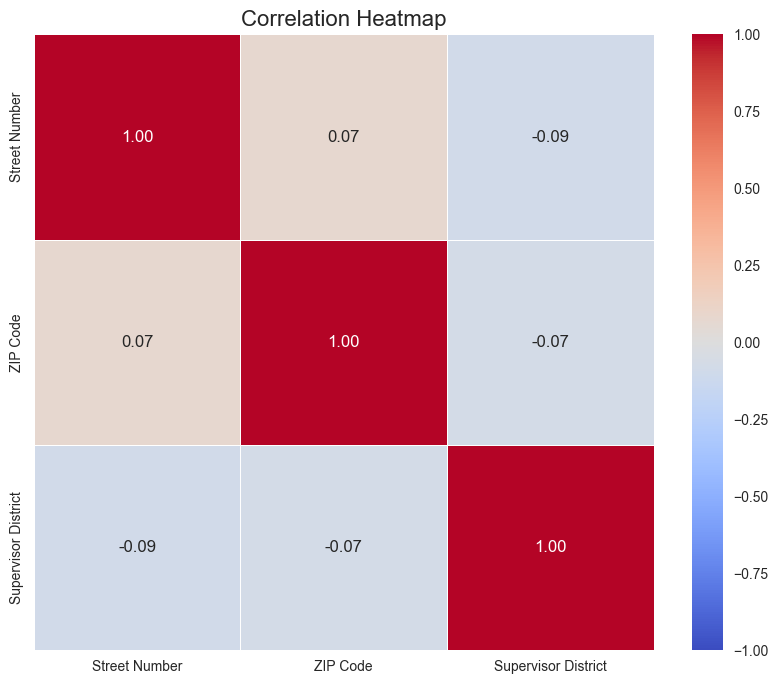

In [45]:
numeric_columns = df.select_dtypes(include=['number'])


# Calculate the correlation matrix for the remaining numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks()
plt.yticks()
plt.show()

The correlation matrix indicates that the correlations among numeric features are low. These features might be nonlinear or the numeric features are independent. 

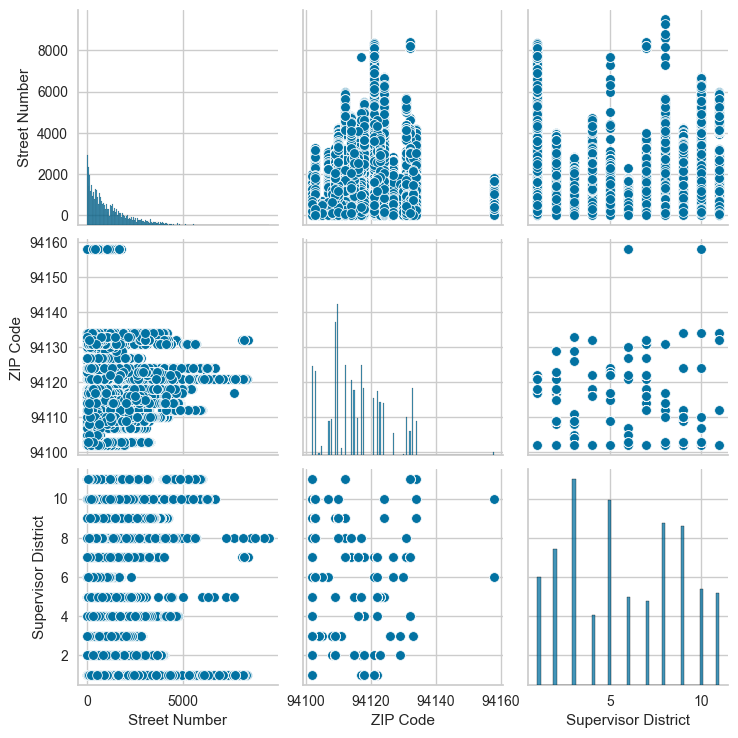

In [46]:
sns.pairplot(df)

The pair plot helps us assess potential correlations and patterns that might not be captured by the correlation matrix alone. As for the scatter plots, it shows that most numeric features do not exhibit strong linear relationships. Some features show clustered or dispersed distributions, which suggests that their relationships may be nonlinear or independent.

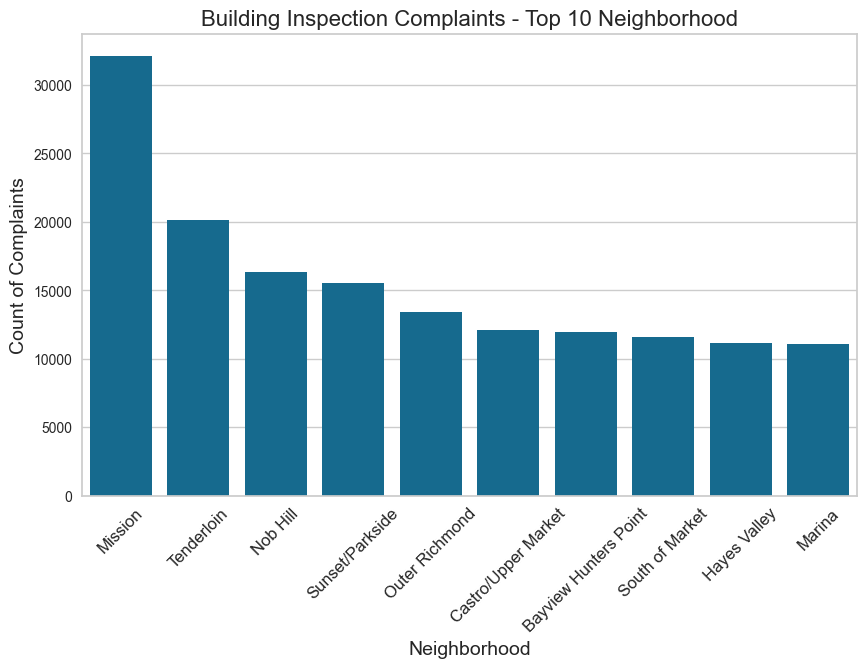

In [47]:
neighborhood_complaints = df['Analysis Neighborhood'].value_counts().sort_values(ascending=False)
top_10_neighborhoods = neighborhood_complaints.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_neighborhoods.index, y=top_10_neighborhoods.values)

plt.xlabel('Neighborhood', fontsize =14)
plt.ylabel('Count of Complaints', fontsize =14)
plt.xticks(rotation=45, fontsize =12)
plt.title('Building Inspection Complaints - Top 10 Neighborhood', fontsize =16)

plt.show()

In [48]:
receiving_counts = df['Receiving Division'].value_counts()
assigned_counts = df['Assigned Division'].value_counts()

divisions = pd.merge(receiving_counts, assigned_counts, left_index=True, right_index=True, suffixes=('_receiving', '_assigned'))
divisions.sort_values(by='count_receiving', ascending=False, inplace= True)
divisions.reset_index(inplace=True)
divisions.rename(columns={'index': 'division'}, inplace=True)

melt_divisions = divisions.melt(id_vars=['division'], var_name='Count Type', value_name='Count')

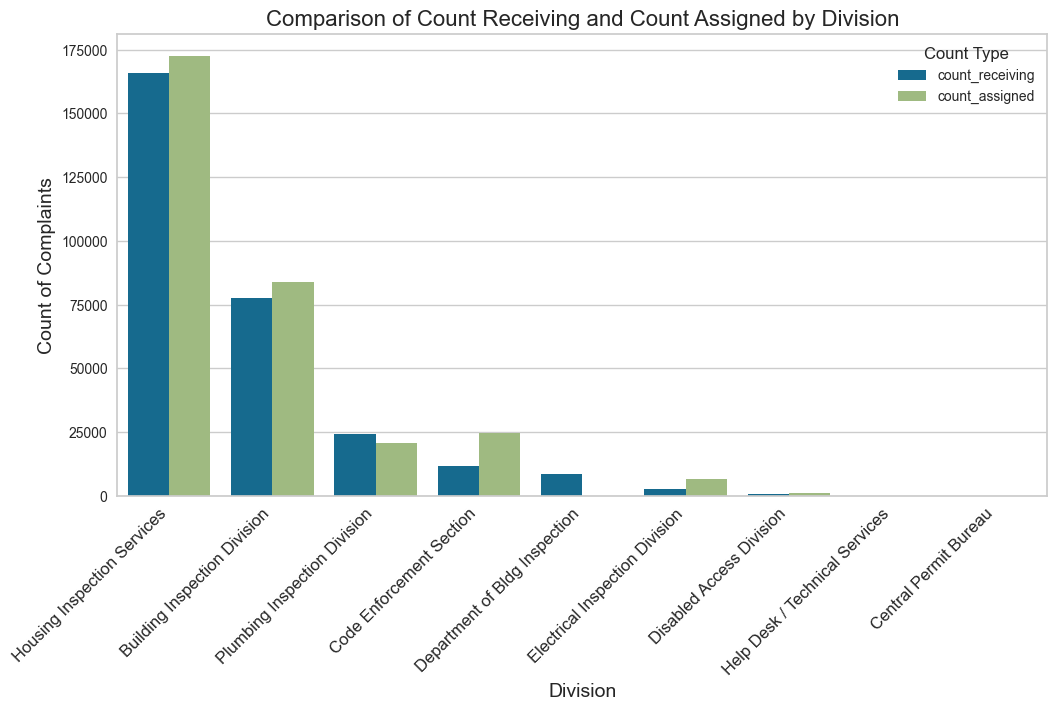

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='division', y='Count', hue='Count Type', data=melt_divisions)
plt.xlabel('Division', fontsize =14)
plt.ylabel('Count of Complaints', fontsize =14)
plt.title('Comparison of Count Receiving and Count Assigned by Division', fontsize =16)
plt.xticks(rotation= 45, ha='right', fontsize =12)
plt.legend(title='Count Type')

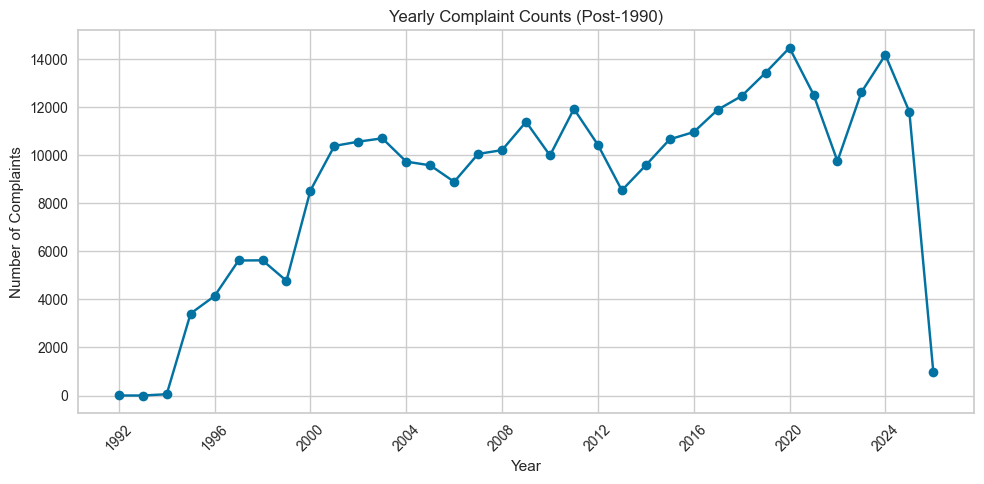

In [50]:
df_vis = df
df_vis = df_vis[df_vis['Date Filed'] >= '1990-01-01']
df_vis['Date Filed'] = pd.to_datetime(df_vis['Date Filed'], errors='coerce')
df_vis.set_index('Date Filed', inplace=True)
yearly_counts = df_vis.resample('Y').size().reset_index(name='count')
plt.figure(figsize=(10,5))
plt.plot(yearly_counts['Date Filed'], yearly_counts['count'], marker='o')
plt.title('Yearly Complaint Counts (Post-1990)')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('my_line_chart.png', dpi=300, bbox_inches='tight')
plt.show()
df_vis.reset_index(inplace=True)

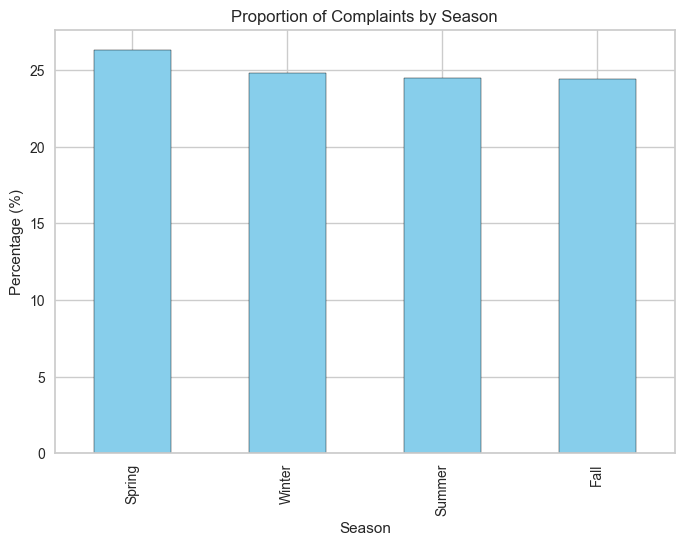

In [51]:
import matplotlib.pyplot as plt
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Date Filed'] = pd.to_datetime(df['Date Filed'], errors='coerce')
df['Season'] = df['Date Filed'].dt.month.apply(get_season)

season_counts = df['Season'].value_counts(normalize=True)

season_counts_percent = season_counts * 100
import matplotlib.pyplot as plt
season_counts_percent.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Percentage (%)')
plt.title('Proportion of Complaints by Season')
plt.show()

In [56]:
import folium
import matplotlib
neighborhood_complaints = df_vis['Analysis Neighborhood'].value_counts().sort_values(ascending=False)
top_10_neighborhoods = neighborhood_complaints.head(10)
df_top10 = df_vis[df_vis['Analysis Neighborhood'].isin(top_10_neighborhoods.index)]
import pandas as pd
from shapely import wkt

import re


df_top10['lon'] = df_top10['point'].str.extract(r'POINT \((-?\d+\.\d+)')[0].astype(float)
df_top10['lat'] = df_top10['point'].str.extract(r'(-?\d+\.\d+)\)')[0].astype(float)


df_top10[['point', 'lon', 'lat']].head()

def get_lon_lat_from_string(pt):
  
    coords_str = pt.replace("POINT (", "").replace(")", "")
    lon_str, lat_str = coords_str.split()
    return float(lon_str), float(lat_str)

df_top10['lon'], df_top10['lat'] = zip(*df_top10['point'].apply(get_lon_lat_from_string))

df_sample = df_top10.sample(n=10000, random_state=42)

unique_hoods = df_sample['Analysis Neighborhood'].unique()

colors = plt.cm.tab20(np.linspace(0, 1, len(unique_hoods)))

hood_to_color = {
    hood: matplotlib.colors.to_hex(color)
    for hood, color in zip(unique_hoods, colors)
}

m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

for idx, row in df_sample.iterrows():
    hood = row['Analysis Neighborhood']
    color = hood_to_color[hood]
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        color=color,
        fill=True,
        fill_opacity=0.7
    ).add_to(m)
m



## Data Preprocessing

In [7]:
df.isnull().sum()

Complaint Number              0
Date Filed                    0
Closed Date              219138
Block                         0
Lot                           0
Parcel Number                 0
Street Number                 0
Street Name                   0
Street Suffix                 0
ZIP Code                    143
Complaint Description       434
Status                        0
Receiving Division            0
Assigned Division             8
Analysis Neighborhood       530
Supervisor District         530
point                       530
point_source                530
data_as_of                    0
data_loaded_at                0
dtype: int64

In [8]:

df.duplicated().sum()


0

In [9]:
df_clean = df

#df_clean['Closed Date'] = df_clean['Closed Date'].replace('', None) 
# df_clean['Closed Date'] = df_clean['Closed Date'].fillna('1900-01-01')
df_clean['Closed Date'] = df_clean['Closed Date'].fillna('1900-01-01')

In [10]:
df_clean['Complaint Description'] = df_clean['Complaint Description'].fillna('No Description')
df_clean = df_clean.dropna(subset = ['ZIP Code', 'Analysis Neighborhood', 'Supervisor District', 'point', 'point_source'])


In [11]:
df_clean.isnull().sum()

Complaint Number         0
Date Filed               0
Closed Date              0
Block                    0
Lot                      0
Parcel Number            0
Street Number            0
Street Name              0
Street Suffix            0
ZIP Code                 0
Complaint Description    0
Status                   0
Receiving Division       0
Assigned Division        8
Analysis Neighborhood    0
Supervisor District      0
point                    0
point_source             0
data_as_of               0
data_loaded_at           0
dtype: int64

In [12]:
df_clean.shape

(309423, 20)

In [13]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 309423 entries, 30 to 310075
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Complaint Number       309423 non-null  object 
 1   Date Filed             309423 non-null  object 
 2   Closed Date            309423 non-null  object 
 3   Block                  309423 non-null  object 
 4   Lot                    309423 non-null  object 
 5   Parcel Number          309423 non-null  object 
 6   Street Number          309423 non-null  int64  
 7   Street Name            309423 non-null  object 
 8   Street Suffix          309423 non-null  object 
 9   ZIP Code               309423 non-null  float64
 10  Complaint Description  309423 non-null  object 
 11  Status                 309423 non-null  object 
 12  Receiving Division     309423 non-null  object 
 13  Assigned Division      309415 non-null  object 
 14  Analysis Neighborhood  309423 non-null  

In [14]:
df_clean.columns

Index(['Complaint Number', 'Date Filed', 'Closed Date', 'Block', 'Lot',
       'Parcel Number', 'Street Number', 'Street Name', 'Street Suffix',
       'ZIP Code', 'Complaint Description', 'Status', 'Receiving Division',
       'Assigned Division', 'Analysis Neighborhood', 'Supervisor District',
       'point', 'point_source', 'data_as_of', 'data_loaded_at'],
      dtype='object')

In [15]:
df_clean['Supervisor District'].nunique()


11

In [16]:
df_clean['Date Filed'] = pd.to_datetime(df_clean['Date Filed'],  errors='coerce')
df_clean['Closed Date'] = pd.to_datetime(df_clean['Closed Date'],  errors='coerce', dayfirst=False)

df_clean['Filed_year'] = df_clean['Date Filed'].dt.year
df_clean['Filed_month'] = df_clean['Date Filed'].dt.month
df_clean['Filed_day'] = df_clean['Date Filed'].dt.day
df_clean['Closed_year'] = df_clean['Closed Date'].dt.year
df_clean['Closed_month'] = df_clean['Closed Date'].dt.month
df_clean['Closed_day'] = df_clean['Closed Date'].dt.day

df_clean = df_clean.drop(columns=['Complaint Number',
                            'Date Filed', 'Closed Date',
                            'Block', 'Lot','Parcel Number', 'Street Number', 'Street Name', 'Street Suffix', 'point', 'point_source', 
                            'data_as_of', 'data_loaded_at']) 

df_clean_raw = df_clean.drop(columns=['Closed_year', 'Closed_month', 'Closed_day', 'Complaint Description'])
df_clean_raw.head()


ZIP Code      Status           Receiving Division  \
30   94124.0      Active     Code Enforcement Section   
32   94114.0      Active     Code Enforcement Section   
36   94102.0      Active  Housing Inspection Services   
37   94102.0  Not Active  Housing Inspection Services   
38   94112.0  Not Active  Housing Inspection Services   

              Assigned Division  Analysis Neighborhood  Supervisor District  \
30     Code Enforcement Section  Bayview Hunters Point                 10.0   
32     Code Enforcement Section             Noe Valley                  8.0   
36  Housing Inspection Services             Tenderloin                  5.0   
37  Housing Inspection Services             Tenderloin                  5.0   
38  Housing Inspection Services          Outer Mission                 11.0   

    Filed_year  Filed_month  Filed_day  
30      2024.0          2.0        7.0  
32      2023.0         11.0        1.0  
36      2024.0         11.0       21.0  
37      1994.0          7.0       27.0  
38      1995.0          7.0       31.0

In [17]:
df_clean_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309423 entries, 30 to 310075
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ZIP Code               309423 non-null  float64
 1   Status                 309423 non-null  object 
 2   Receiving Division     309423 non-null  object 
 3   Assigned Division      309415 non-null  object 
 4   Analysis Neighborhood  309423 non-null  object 
 5   Supervisor District    309423 non-null  float64
 6   Filed_year             309418 non-null  float64
 7   Filed_month            309418 non-null  float64
 8   Filed_day              309418 non-null  float64
dtypes: float64(5), object(4)
memory usage: 23.6+ MB


In [18]:
df_clean_raw.isnull().sum()

ZIP Code                 0
Status                   0
Receiving Division       0
Assigned Division        8
Analysis Neighborhood    0
Supervisor District      0
Filed_year               5
Filed_month              5
Filed_day                5
dtype: int64

In [19]:
df_clean_raw = df_clean_raw.dropna()

In [20]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Status', 'Receiving Division', 'Assigned Division', 'Analysis Neighborhood']

label_encoder = LabelEncoder()
for col in categorical_columns:
    df_clean_raw[col] = label_encoder.fit_transform(df_clean_raw[col])



In [21]:
df_clean_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309410 entries, 30 to 310075
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ZIP Code               309410 non-null  float64
 1   Status                 309410 non-null  int32  
 2   Receiving Division     309410 non-null  int32  
 3   Assigned Division      309410 non-null  int32  
 4   Analysis Neighborhood  309410 non-null  int32  
 5   Supervisor District    309410 non-null  float64
 6   Filed_year             309410 non-null  float64
 7   Filed_month            309410 non-null  float64
 8   Filed_day              309410 non-null  float64
dtypes: float64(5), int32(4)
memory usage: 18.9 MB


## Prelimanary Results and Analysis

In [22]:
df_clean_raw.isnull().sum()

ZIP Code                 0
Status                   0
Receiving Division       0
Assigned Division        0
Analysis Neighborhood    0
Supervisor District      0
Filed_year               0
Filed_month              0
Filed_day                0
dtype: int64

In [23]:
df_clean

ZIP Code                              Complaint Description  \
30       94124.0                                    Vacant building   
32       94114.0                                  Vacant storefront   
36       94102.0                                            No heat   
37       94102.0  No cold water(unable to shower) no heat...poss...   
38       94112.0  Illegal unit-no separate meter; meter is share...   
...          ...                                                ...   
310071   94114.0  Date last observed: 03-sep-24; exact location:...   
310072   94122.0  Unpermitted construction in unit 2. they have ...   
310073   94110.0  Date last observed: 24-oct-24; identity of per...   
310074   94114.0                             No heat 9am-5pm daily.   
310075   94116.0  An internal audit has reason to believe that t...   

            Status            Receiving Division  \
30          Active      Code Enforcement Section   
32          Active      Code Enforcement Section   
36          Active   Housing Inspection Services   
37      Not Active   Housing Inspection Services   
38      Not Active   Housing Inspection Services   
...            ...                           ...   
310071  Not Active  Building Inspection Division   
310072  Not Active  Building Inspection Division   
310073  Not Active      Code Enforcement Section   
310074  Not Active   Housing Inspection Services   
310075      Active           Inspection Services   

                     Assigned Division  Analysis Neighborhood  \
30            Code Enforcement Section  Bayview Hunters Point   
32            Code Enforcement Section             Noe Valley   
36         Housing Inspection Services             Tenderloin   
37         Housing Inspection Services             Tenderloin   
38         Housing Inspection Services          Outer Mission   
...                                ...                    ...   
310071  Help Desk / Technical Services    Castro/Upper Market   
310072    Building Inspection Division           Inner Sunset   
310073        Code Enforcement Section                Mission   
310074     Housing Inspection Services    Castro/Upper Market   
310075    Building Inspection Division        Sunset/Parkside   

        Supervisor District  Filed_year  Filed_month  Filed_day  Closed_year  \
30                     10.0      2024.0          2.0        7.0       1900.0   
32                      8.0      2023.0         11.0        1.0       1900.0   
36                      5.0      2024.0         11.0       21.0       1900.0   
37                      5.0      1994.0          7.0       27.0       1900.0   
38                     11.0      1995.0          7.0       31.0       1900.0   
...                     ...         ...          ...        ...          ...   
310071                  8.0      2024.0         12.0        4.0          NaN   
310072                  7.0      2025.0          1.0       10.0          NaN   
310073                 10.0      2024.0         10.0       25.0          NaN   
310074                  8.0      2024.0         11.0       25.0       1900.0   
310075                  4.0      2024.0         12.0        6.0       1900.0   

        Closed_month  Closed_day  
30               1.0         1.0  
32               1.0         1.0  
36               1.0         1.0  
37               1.0         1.0  
38               1.0         1.0  
...              ...         ...  
310071           NaN         NaN  
310072           NaN         NaN  
310073           NaN         NaN  
310074           1.0         1.0  
310075           1.0         1.0  

[309423 rows x 13 columns]

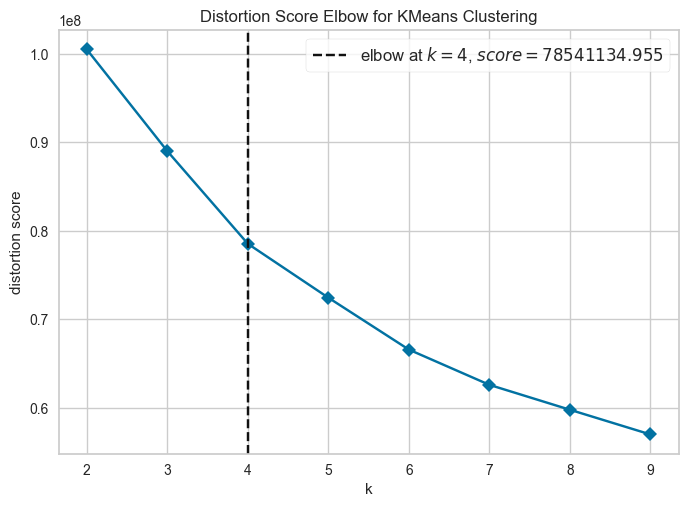

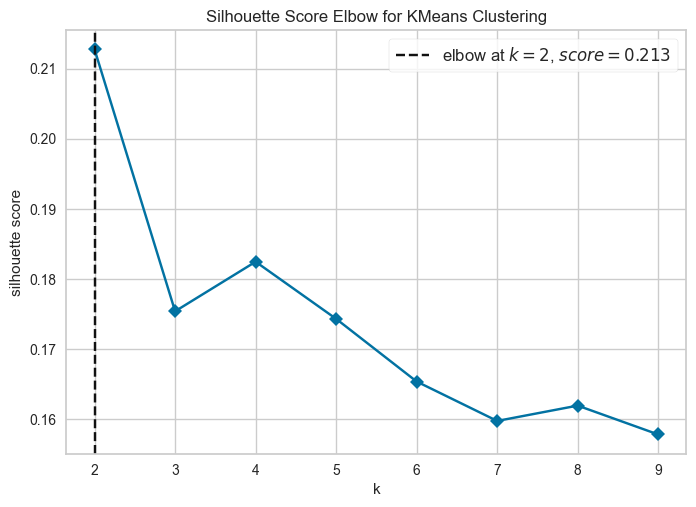

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(2, random_state= 42)

kmeans.fit(df_clean_raw)


visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(df_clean_raw)        # Fit the data to the visualizer
visualizer.show()

visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='silhouette', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(df_clean_raw)        # Fit the data to the visualizer
visualizer.show()
   

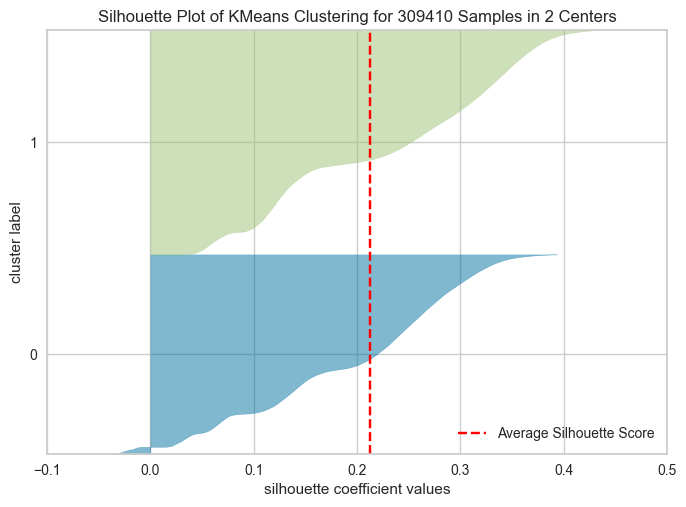

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 309410 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model = KMeans(2, random_state= 42)
visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick', timings=False)

visualizer.fit(df_clean_raw)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

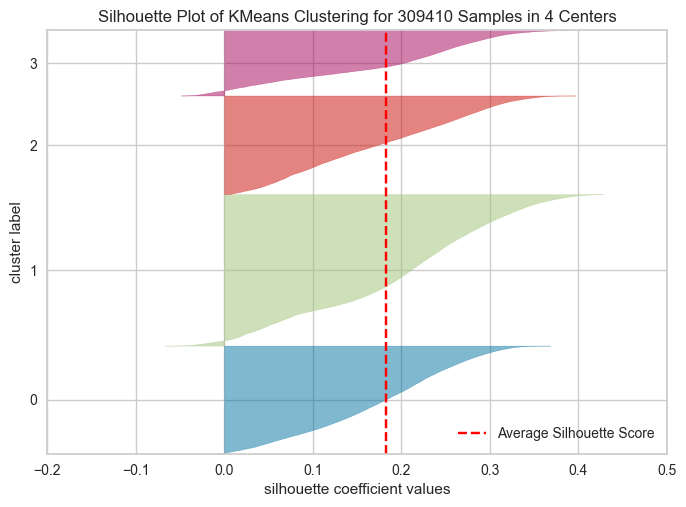

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 309410 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model_4 = KMeans(4, random_state= 42)
visualizer = SilhouetteVisualizer(kmeans_model_4, colors='yellowbrick', timings=False)

visualizer.fit(df_clean_raw)        # Fit the data to the visualizer
visualizer.show()     